In [11]:
import numpy as np
import numpy
import matplotlib.pyplot
import matplotlib.pyplot as plt
import copy
import random
#import torch
import math
import os
import sys

import pandas as pd
import pandas
# from playsound import playsound
#help(playsound)

import time

from time import time
from time import *

from mpl_toolkits.mplot3d import Axes3D

from pydub import AudioSegment
# from pydub.playback import play
import os
import statistics
import statistics as st
# from hopfieldnetwork import HopfieldNetwork
import gc 

import time

from datetime import datetime

# from numba import jit
# from numba import njit


# import sys
# import time
# from tqdm.notebook import tqdm
# import shutil

import tqdm

# import pixiedust

In [12]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__

In [13]:
modulenames = set(sys.modules) & set(globals())
allmodules = [sys.modules[name] for name in modulenames]
allmodules

[<module 'tqdm' from 'C:\\Anaconda3\\lib\\site-packages\\tqdm\\__init__.py'>,
 <module 'matplotlib' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>,
 <module 'time' (built-in)>,
 <module 'random' from 'C:\\Anaconda3\\lib\\random.py'>,
 <module 'gc' (built-in)>,
 <module 'sys' (built-in)>,
 <module 'copy' from 'C:\\Anaconda3\\lib\\copy.py'>,
 <module 'pandas' from 'C:\\Anaconda3\\lib\\site-packages\\pandas\\__init__.py'>,
 <module 'os' from 'C:\\Anaconda3\\lib\\os.py'>,
 <module 'types' from 'C:\\Anaconda3\\lib\\types.py'>,
 <module 'numpy' from 'C:\\Anaconda3\\lib\\site-packages\\numpy\\__init__.py'>,
 <module 'datetime' from 'C:\\Anaconda3\\lib\\datetime.py'>,
 <module 'math' (built-in)>,
 <module 'statistics' from 'C:\\Anaconda3\\lib\\statistics.py'>]

In [14]:
modulenames

{'copy',
 'datetime',
 'gc',
 'math',
 'matplotlib',
 'numpy',
 'os',
 'pandas',
 'random',
 'statistics',
 'sys',
 'time',
 'tqdm',
 'types'}

In [15]:
for i,a in enumerate(modulenames):
    print(i,a)

0 tqdm
1 matplotlib
2 time
3 random
4 gc
5 sys
6 copy
7 pandas
8 os
9 types
10 numpy
11 datetime
12 math
13 statistics


In [9]:
os.__doc__

"OS routines for NT or Posix depending on what system we're on.\n\nThis exports:\n  - all functions from posix or nt, e.g. unlink, stat, etc.\n  - os.path is either posixpath or ntpath\n  - os.name is either 'posix' or 'nt'\n  - os.curdir is a string representing the current directory (always '.')\n  - os.pardir is a string representing the parent directory (always '..')\n  - os.sep is the (or a most common) pathname separator ('/' or '\\\\')\n  - os.extsep is the extension separator (always '.')\n  - os.altsep is the alternate pathname separator (None or '/')\n  - os.pathsep is the component separator used in $PATH etc\n  - os.linesep is the line separator in text files ('\\r' or '\\n' or '\\r\\n')\n  - os.defpath is the default search path for executables\n  - os.devnull is the file path of the null device ('/dev/null', etc.)\n\nPrograms that import and use 'os' stand a better chance of being\nportable between different platforms.  Of course, they must then\nonly use functions that a

In [4]:
imports()

<generator object imports at 0x000002017F3F8F20>

In [2]:
# Useful functions
# @njit
def IsScalar(x):
    if type(x) in (list, np.ndarray,):
        return False
    else:
        return True
    

'''
Make sure the values in the hopefild Network 
are bipolar (-1,1)
'''
def Thresh(x):
    if IsScalar(x):
        val = 1 if x>0 else -1
    else:
        val = np.ones_like(x)
        val[x<0] = -1.
    return val

'''
Define Transpose for special cases
'''
def Transpose(x):
    a = x[np.newaxis].T
    return a

'''
# A function to calculate the weight of the vector
'''
def weight(a):
    if len(a.shape) > 1:
        out = ( a.T @ a ) #/ n - np.eye(N)
    else:
        out = Transpose(a)*a
    return out

# def weight(a):
#     if len(a.shape) > 1:
#         out = ( a.T @ a ) #/ n - np.eye(N)
#     else:
#         out = Transpose(a)*a
#     return Thresh(out)

def weight_self(a):
    #x = Thresh(a)    
    if len(a.shape) > 1:
        w = ( a.T @ a ) #/ n - np.eye(N)
        out = Thresh(w) - np.identity(a.shape[1])
    else:
        w = Transpose(a)*a
        out = Thresh(w) - np.identity(len(a)) 
    return out

# v -> W(v)
# x



'''
# A function to genetate random values without repeat
# Also for random permutation
'''
def randomize(N):
    from numpy.random import default_rng
    rng = default_rng()
    numbers = rng.choice(N, size=N, replace=False)
    return numbers

def randd(N):
    r = np.random.permutation(N)
    return r

    
'''
# A function that show the number cordinates that are different 
'''   
def Hamming(x,y):
    return np.count_nonzero(x!=y)
    # return np.sum(x!=y)
    
    
def Mod_Hamming(x,y):
    if (x==-1*y).all():
        return -1
    elif (-1*x==y).all():
        return -1
    else:
        return np.sum(x!=y)
'''
# Prime number generator
'''  
def prime_generator(end):
    for n in range(3, end):     # n starts from 3 to end
        for x in range(2, n):   # check if x can be divided by n
            if n % x == 0:      # if true then n is not prime
                break
        else:                   # if x is found after exhausting all values of x
            yield n             # generate the prime
            

def Prime_List(l):
    g = prime_generator(l)       # give firt l prime numbers
    a = list(g)
    out = []
    for i in a:
        ## Random
        N = i
        w = int(0.09*i)
        j = w%2
        if w < 2:
            n = 3
        elif j == 0:
            n = w+1
        else:
            n = w
        k = (n,N)
        out.append(k)
    return out       

def Prime_ramge(a,b):
    # Python program to display all the prime numbers within an interval    
    out = []
    # print("Prime numbers between", a, "and", b, "are:")
    for num in range(a, b + 1):
        # all prime numbers are greater than 1
        if num > 1:
            for i in range(2, num):
                if (num % i) == 0:
                    break
            else:
                out.append(num)
               # print(num)   
    return out 


'''
# A function for update in hopfield net
'''  
def Update(W, x, n):
    u = x.dot(W[:, n])
    if u >= 0:
        u = 1
    else:
        u = -1
    x[n] = u
    xnew = x
    return xnew


def Updateb(W, x, b):
    if len(a.shape) > 1:
        b = np.sum(v, axis=0) / x.shape[0]
    else:
        b = np.sum(v, axis=0) / x.shape[0] 
    xnew = x @ W - b
    return Thresh(xnew)


'''
# Perturbation of the net
'''
def Perturbx(x, p=0.1):
    '''
        y = Perturb(x, p=0.1)
        
        Apply binary noise to x. With probability p, each bit will be randomly
        set to -1 or 1.
        
        Inputs:
          x is an array of binary vectors of {-1,1}
          p is the probability of each bit being randomly flipped
        
        Output:
          y is an array of binary vectors of {-1,1}
    '''
    y = copy.deepcopy(x)
    for yy in y:
        for k in range(len(yy)):
            if np.random.rand()<p:
                yy[k] = Thresh(np.random.randint(2)*2-1)
    return y

def Perturb1x(x, p=0.1):    
    y = copy.deepcopy(x)
    for k in range(len(y)):
        if np.random.rand()<p:
            y[k] = Thresh(np.random.randint(2)*2-1)        
    return y

def Perturb(x, p=0.1):
    if len(v.shape) > 1:
        u=Perturbx(x, p=0.1)
    else:
        u=Perturb1x(x, p=0.1)
    return u


'''
# recall_memory is showing the Hamming distance of each pattern to an updated rule
'''
def recall_1mem(v,x):
    N = v.shape[0]    
    o = (-1*x)
    d = Hamming(x, v)   
    if d == N:
        if (o == v).all():
            d = Hamming(o, v) 
    # print('Memory '+str(0)+' has error '+str(d))
    
    a = 'at index '
    j = 0
    s = '{}{}'.format(a, 0)
    return d,s


def recall_mem(v,x):
    k = []
    j = []
    N = v.shape[1]
    o = (-1*x)
    for idx,t in enumerate(v):
        # print(t)
        # print(idx)
        d = Hamming(x, t)
        if d == N:
            if (o == t).all():
                d = Hamming(o, t)
                
        k.append(d)
        z = (d,idx)
        j.append(z)
        # print(d)
        # print('Memory '+str(idx)+' has error '+str(d))
    # print(k)
    a = st.mean(k)
    m = min(k)
    p = max(k)
    z = [index for (ham,index) in j if ham == m]
    q = z[0]
    a = 'at index '
    s = '{}{}'.format(a, q)
    return m,s

            
def recall_memory(v,x):
    if len(v.shape) > 1:
        d = recall_mem(v,x)
        m = d[0]
        s = d[1]
    else:
        d = recall_1mem(v,x)
        m = d[0]
        s = d[1]
    return m,s



'''
# Perturbed_memory 
'''
def Perturbed_memory(v,p):    
    if len(v.shape) > 1:
        len_v = v.shape[0]
        k = np.random.randint(len_v)
        Y = Perturb( v , p=p ) 
        x = Y[k:k+1,]
        v_k = v[k:k+1,:]
    else:
        len_v = 1
        k = 1
        Y = Perturb( v , p=p )
        x = Y
        v_k = v
    # k = np.random.randint(len_v)
    # Y = Perturb( v , p=0.4 )    
    # x = Y[k:k+1,]
    err = Hamming(x, v_k)
    # print('Class '+str(k)+' with '+str(err)+' errors')
    x_orig = copy.deepcopy(x)
    # print(np.squeeze(np.asarray(x_orig)))
    # print('x \n',x)
    # print('v \n',v)
    # print('v.T \n',v.T)
    # print('Inner Products: '+str(x@v.T))
    return np.squeeze(np.asarray(x_orig))

def flip(x):
    f = -1 * x
    return f
    
def flipn(x,n):
    f = -1*x[n]
    x[n] = f
    x_new = x
    return x_new



'''
# A function to calculate the Energy
'''
def Energya(W, X):
    E = []
    for xx in X:
        # blah = - 0.5 * (xx @ W)@xx.T + b@xx.T
        # blah = - 0.5 * (xx @ W)@xx.T
        blahi = (xx.T @ W)@xx
        # blah = - blahi/-2
        blah = -0.5*(blahi)
        E.append(blah)
    return E

def Energyb(W,X):
    # w = weight(x)
    # E = -0.5*(X.dot(W.dot(X)))
    # E = - 0.5 * (X @ W)@X.T
    Ei = (X.T @ W)@X
    # # E = Ei/-2
    E = Ei/(-2)
    #E = -0.5*(np.dot(x,np.dot(w,x)))
    #E = -0.5*np.dot(x,dot(w,x))
    return E

def Energy(W, X):
    # W = weight(X)
    if len(X.shape) > 1:
        E = Energya(W, X)
    else:
        E = Energyb(W,X)
    return E



def n_energy(v,x,k):
    a = v.T@x
    # print(a)
    E = (a)**k
    return E*(-0.5)



def n2_energy(v,x,k):
    ne = []
    for i in v:
        n=n_energy(i,x,k)
        ne.append(n)
    E = sum(ne)
    return E
            


def New_Energy(v,x,k):
    if len(v.shape) > 1:
        E = n2_energy(v,x,k)
    else:
        E = n_energy(v,x,k)
    return E


def capacity(v):
    if len(v.shape) > 1:
        n = v.shape[1] 
    else:
        n = v.shape(0)        
    print(n)
    log = 2*(math.log(n,2)) # math.log(number,base)
    c = n/log
    return c

In [3]:
mmm = math.log(5,2)
mmm

2.321928094887362

In [4]:
lll = mmm * 2
lll 

4.643856189774724

In [5]:
ccc = 5/lll
ccc

1.0766913951834827

In [6]:
## Random
N = 5
n = 2
s = np.random.normal(size=(n,N))
d = np.random.normal(size=(N))
v = Thresh(s)
x = Thresh(d)
print('v:\n',v,'\n','x:\n',x)
W = weight(v)
print('\n','\n',W,'\n','\n')
# for i in v:
#     print(i)
#     w = weight(i)
#     print(w,'\n')
 
Energy(W,x)

print('capacity:\n','\n',capacity(v),'\n','\n')


# New_energy(v,x,2)

v:
 [[ 1.  1. -1. -1. -1.]
 [-1. -1.  1.  1.  1.]] 
 x:
 [ 1.  1. -1.  1. -1.]

 
 [[ 2.  2. -2. -2. -2.]
 [ 2.  2. -2. -2. -2.]
 [-2. -2.  2.  2.  2.]
 [-2. -2.  2.  2.  2.]
 [-2. -2.  2.  2.  2.]] 
 

5
capacity:
 
 1.0766913951834827 
 



In [7]:
New_Energy(v,x,2)

-9.0

In [8]:
## Random
N = 7
n = 3
s = np.random.normal(size=(n,N))
d = np.random.normal(size=(N))
v = Thresh(s)
x = Thresh(d)
print('v:\n',v,'\n','x:\n',x)
W = weight(v)
print('\n','Weight: \n',W,'\n','\n')
# for i in v:
#     print(i)
#     w = weight(i)
#     print(w,'\n')
EW = Energy(W,x)

EP = New_Energy(v,x,2)


print('\n','\n','Energy: \n',EW,'\n','\n','\n','New Energy: \n',EP)

v:
 [[-1. -1. -1.  1. -1.  1.  1.]
 [ 1.  1. -1.  1. -1.  1. -1.]
 [-1. -1.  1. -1.  1. -1. -1.]] 
 x:
 [-1.  1.  1.  1.  1.  1. -1.]

 Weight: 
 [[ 3.  3. -1.  1. -1.  1. -1.]
 [ 3.  3. -1.  1. -1.  1. -1.]
 [-1. -1.  3. -3.  3. -3. -1.]
 [ 1.  1. -3.  3. -3.  3.  1.]
 [-1. -1.  3. -3.  3. -3. -1.]
 [ 1.  1. -3.  3. -3.  3.  1.]
 [-1. -1. -1.  1. -1.  1.  3.]] 
 


 
 Energy: 
 -1.5 
 
 
 New Energy: 
 -1.5


In [9]:
flip(x)

array([ 1., -1., -1., -1., -1., -1.,  1.])

In [10]:
flipn(x,1)

array([-1., -1.,  1.,  1.,  1.,  1., -1.])

In [12]:
'''
# Find the steady state of you network
  Train the nextwork 
  initiate the first check to strady state 
  to the Update 
'''
def in_state_flip(v,x):  
    M = weight(v)
    print('\n training v: ',v)
    print('Weight \n', M)
    Ev = Energy(M,v)
    Ex = Energy(M,x)
    if len(v.shape) > 1:
        N = v.shape[1]        
        k = np.random.randint(len(v))
        new_v = v[k]
        # new_v = v[k:k+1,]
        # new_v = copy.deepcopy(v)
    else:
        N = v.shape[0]
        new_v = copy.deepcopy(v)
        
    list_x_new = np.empty((0,N), int)    
    # en = np.empty((0,N), int) 
    x0 = copy.deepcopy(x)
    numbers = randd(N)     
    print('\n Update sequence',numbers)    
    n = 0    
    ham = []    
    En = []
    detE = []
    print('\n input x: ',x0)
    for i in numbers: 
        n += 1  
        E1 = Energy(M,x0)
        ee = copy.deepcopy(x0)
        x_new = flipn(ee,i) 
        E2 = Energy(M, x_new)
        print('\n Energy of x: ',E1,'\n update of flip ', x_new,'\n Energy of flip ', E2)
        if(E2 < E1):
            update = x_new
            E = E2
        else:
            update = x0
            E = E1
            
            
        if len(En) > 0:
            E_old = En[-1]
            dE = E - E_old  
        else:            
            dE = 0 
             
        detE.append(dE)
        En.append(E) 
            
            
        
        h = Hamming(new_v,update)
        
        
        if h == -1:
            update = -1*update
            h = Hamming(new_v,update)            
        
        if h == N:
            o = -1*update
            if (o == v).all():
                h = Hamming(o, new_v)
                
            # h = 0                
        list_x_new = np.vstack([list_x_new, update])
        
        ham.append(h)
        print('\n hamming Value: ',h)
        
        #print(h)
        x0 = update
        if h == 0:
            # print('worked: converged to memory')
            break 
            
    # Ez = Energy(en)
    # print('F Energy: \n', Ez)
    # print('Energy: \n',En) 
    # if detE[0] == -1:
    #     detE[0] = 0
        # detE.pop(0)
    # return n,ham,l,h,x_new,En,detE
    return n,ham,list_x_new,h,update,En,detE

In [14]:
'''
# Find the steady state of you network
  Train the nextwork 
  initiate the first check to strady state 
  to the Update 
'''

def in_state_flipM(v,M,N,x):  
    # M = weight(v)
    # print('\n training v: ',v)
    # print('Weight \n', M)
    # E = Energy(M,v)
    # if len(v.shape) > 1:
    #     N = v.shape[1]        
    #     k = np.random.randint(len(v))
    #     new_v = v[k:k+1,]
    # else:
    #     N = v.shape[0]
    new_v = copy.deepcopy(v)
        
    list_x_new = np.empty((0,N), int)    
    # en = np.empty((0,N), int) 
    x0 = copy.deepcopy(x)
    numbers = randd(N)     
    # print('\n Update sequence',numbers)    
    n = 0    
    ham = []    
    En = []
    detE = []
    # print('\n input x: ',x0)
    for i in numbers: 
        n += 1  
        E1 = Energy(M,x0)
        ee = copy.deepcopy(x0)
        x_new = flipn(ee,i) 
        # x_new = flipn(x0,i) 
        E2 = Energy(M, x_new)
        # print('\n Energy of x: ',E1,'\n update of flip ', x_new,'\n Energy of flip ', E2)
        if(E2<E1):
            update = x_new
            E = E2
        else:
            update = x0
            E = E1
            
            
        if len(En) > 0:
            E_old = En[-1]
            dE = E - E_old   
        else:            
            dE = 0 
             
        detE.append(dE)    
        En.append(E) 
            
            
        
        h = Hamming(new_v,update)        
        
        if h == -1:
            update = -1*update
            h = Hamming(new_v,update)          
        
        if h == N:
            o = -1*update
            if (o == v).all():
                h = Hamming(o, new_v)
                
            # h = 0                
        list_x_new = np.vstack([list_x_new, update])
        
        ham.append(h)
        # print('\n hamming Value: ',h)
        
        #print(h)
        x0 = update
        if h == 0:
            # print('worked: converged to memory')
            break 
            
    # Ez = Energy(en)
    # print('F Energy: \n', Ez)
    # print('Energy: \n',En) 
    # if detE[0] == -1:
    #     detE[0] = 0
        # detE.pop(0)
    # return n,ham,l,h,x_new,En,detE
    return n,ham,list_x_new,h,update,En,detE

In [15]:
'''
# Find the steady state of you network
  Train the nextwork 
  initiate the first check to strady state 
  to the Update 
'''
def in_state_flip_new(v,x,g):  
    M = weight(v)
    print('\n training v: ',v)
    print('Weight \n', M)
    E = Energy(M,v)
    if len(v.shape) > 1:
        N = v.shape[1]        
        k = np.random.randint(len(v))
        # new_v = v[k:k+1,]
        new_v = v[k]
    else:
        N = v.shape[0]
        new_v = copy.deepcopy(v)
        
    list_x_new = np.empty((0,N), int)    
    # en = np.empty((0,N), int) 
    x1 = copy.deepcopy(x)
    numbers = randd(N)     
    print('\n Update sequence',numbers)    
    n = 0    
    ham = []    
    En = []
    detE = []
    print('\n input x: ',x1)
    for i in numbers: 
        n += 1  
        E1 = New_Energy(v,x1,g)
        # x_new = flipn(x1,i) 
        ee = copy.deepcopy(x1)
        x_new = flipn(ee,i) 
        E2 = New_Energy(v, x_new,g)
        print('\n Energy of x: ',E1,'\n update of flip ', x_new,'\n Energy of flip ', E2)
        if(E2<E1):
            update = x_new
            E = E2
        else:
            update = x1
            E = E1
            
            
        if len(En) > 0:
            E_old = En[-1]
            dE = E - E_old    
        else:            
            dE = 0 
             
        detE.append(dE)     

        En.append(E) 
            
            
        
        h = Hamming(new_v,update)
        
        
        if h == -1:
            update = -1*update
            h = Hamming(new_v,update)          
        
        if h == N:
            o = -1*update
            if (o == v).all():
                h = Hamming(o, new_v)
                
            # h = 0                
        list_x_new = np.vstack([list_x_new, update])
        
        ham.append(h)
        print('\n hamming Value: ',h)
        
        #print(h)
        x1 = update
        if h == 0:
            # print('worked: converged to memory')
            break 
            
    # Ez = Energy(en)
    # print('F Energy: \n', Ez)
    # print('Energy: \n',En) 
    # if detE[0] == -1:
    #     detE[0] = 0
        # detE.pop(0)
    # return n,ham,l,h,x_new,En,detE
    return n,ham,list_x_new,h,update,En,detE

In [16]:
'''
# Find the steady state of you network
  Train the nextwork 
  initiate the first check to strady state 
  to the Update 
'''

def in_state_flip_newM(v,M,N,x,g):  
    # M = weight(v)
    # print('\n training v: ',v)
    # print('Weight \n', M)
    # E = Energy(M,v)
    # if len(v.shape) > 1:
    #     N = v.shape[1]        
    #     k = np.random.randint(len(v))
    #     new_v = v[k:k+1,]
    # else:
    #     N = v.shape[0]
    new_v = copy.deepcopy(v)
        
    list_x_new = np.empty((0,N), int)    
    # en = np.empty((0,N), int) 
    x1 = copy.deepcopy(x)
    numbers = randd(N)     
    # print('\n Update sequence',numbers)    
    n = 0    
    ham = []    
    En = []
    detE = []
    # print('\n input x: ',x1)
    for i in numbers: 
        n += 1  
        E1 = New_Energy(v,x1,g)
        ee = copy.deepcopy(x1)
        x_new = flipn(ee,i) 
        # x_new = flipn(x1,i) 
        E2 = New_Energy(v, x_new,g)
        # print('\n Energy of x: ',E1,'\n update of flip ', x_new,'\n Energy of flip ', E2)
        if(E2<E1):
            update = x_new
            E = E2
        else:
            update = x1
            E = E1
            
            
        if len(En) > 0:
            E_old = En[-1]
            dE = E - E_old    
        else:            
            dE = 0 
             
        detE.append(dE)     

        En.append(E) 
            
            
        
        h = Hamming(new_v,update)
        
        
        if h == -1:
            update = -1*update
            h = Hamming(new_v,update)          
        
        if h == N:
            o = -1*update
            if (o == v).all():
                h = Hamming(o, new_v)
            
            # h = 0                
        list_x_new = np.vstack([list_x_new, update])
        
        ham.append(h)
        # print('\n hamming Value: ',h)
        
        #print(h)
        x1 = update
        if h == 0:
            # print('worked: converged to memory')
            break 
            
    # Ez = Energy(en)
    # print('F Energy: \n', Ez)
    # print('Energy: \n',En) 
    # if detE[0] == -1:
    #     detE[0] = 0
        # detE.pop(0)
    # return n,ham,l,h,x_new,En,detE
    return n,ham,list_x_new,h,update,En,detE

In [17]:
'''
# Find the steady state of you network
  Train the nextwork 
  initiate the first check to strady state 
  to the Update 
'''
# def in_state(v,M,N,x):
def in_state(v,x):
    M = weight(v)
    print('\n training v: ',v)
    print('Weight \n', M)
    E = Energy(M,v)
    if len(v.shape) > 1:
        N = v.shape[1]        
        k = np.random.randint(len(v))
        # new_v = v[k:k+1,]
        new_v = v[k]
    else:
        N = v.shape[0]
        new_v = copy.deepcopy(v)
        
        
        
    list_x_new = np.empty((0,N), int)    
    # en = np.empty((0,N), int)  
    x2 = copy.deepcopy(x) 
    numbers = randd(N)     
    # print('\n Update sequence',numbers)     
    n = 0      
    ham = []     
    En = [] 
    detE = [] 
    for i in numbers:
        n += 1   
        x_new = Update(M, x2, i) 
        # en = np.vstack([en, x_new])  
        E = Energy(M, x_new) 
        
            
            
        if len(En) > 0:
            E_old = En[-1]
            dE = E - E_old   
        else:            
            dE = 0 
             
        detE.append(dE)
        En.append(E)  
        
        h = Hamming(new_v, x_new)       
        
        
        if h == -1:
            x_new = -1*x_new
            h = Hamming(new_v,x_new)          
        
        if h == N:
            o = -1*x_new
            if (o == v).all():
                h = Hamming(o, new_v)
            
            # h = 0                
        list_x_new = np.vstack([list_x_new, x_new])
        
        ham.append(h)
        print('\n hamming Value: ',h)
        
        #print(h)  
        x2 = x_new
        if h == 0:
            # print('worked: converged to memory')
            break 
            
    # Ez = Energy(en)
    # print('F Energy: \n', Ez)
    # print('Energy: \n',En)  
    # if detE[0] == -1:
    #     detE[0] = 0
        # detE.pop(0)
    # return n,ham,list_x_new,h,update,En,detE
    return n,ham,list_x_new,h,x_new,En,detE

In [18]:
'''
# Find the steady state of you network
  Train the nextwork 
  initiate the first check to strady state 
  to the Update 
'''
# def in_state(v,M,N,x):
def in_stateM(v,M,N,x):
    # M = weight(v)
    # print('\n training v: ',v)
    # print('Weight \n', M)
    # E = Energy(M,v)
    # if len(v.shape) > 1:
    #     N = v.shape[1]        
    #     k = np.random.randint(len(v))
    #     new_v = v[k:k+1,]
    # else:
    #     N = v.shape[0]
    new_v = copy.deepcopy(v)
        
        
        
    list_x_new = np.empty((0,N), int)    
    # en = np.empty((0,N), int)  
    x2 = copy.deepcopy(x) 
    numbers = randd(N)     
    # print('\n Update sequence',numbers)     
    n = 0      
    ham = []     
    En = [] 
    detE = [] 
    for i in numbers:
        n += 1   
        x_new = Update(M, x2, i) 
        # en = np.vstack([en, x_new])  
        E = Energy(M, x_new) 
        
            
            
        if len(En) > 0:
            E_old = En[-1]
            dE = E - E_old   
        else:            
            dE = 0 
             
        detE.append(dE)
        En.append(E)  
        
        h = Hamming(new_v, x_new)       
        
        
        if h == -1:
            x_new = -1*x_new
            h = Hamming(new_v,x_new)      
        
        if h == N:
            o = -1*x_new
            if (o == v).all():
                h = Hamming(o, new_v)
            
            # h = 0                
        list_x_new = np.vstack([list_x_new, x_new])
        
        ham.append(h)
        # print('\n hamming Value: ',h)
        #print(h)  
        x2 = x_new
        if h == 0:
            # print('worked: converged to memory')
            break 
            
    # Ez = Energy(en)
    # print('F Energy: \n', Ez)
    # print('Energy: \n',En)  
    # if detE[0] == -1:
    #     detE[0] = 0
        # detE.pop(0)
    # return n,ham,list_x_new,h,update,En,detE
    return n,ham,list_x_new,h,x_new,En,detE

In [19]:
## Random
N = 5
n = 2
s = np.random.normal(size=(N))
d = np.random.normal(size=(N))
v = Thresh(s)
x = Thresh(d)
print('v:\n',v,'\n','x:\n',x)
W = weight(v)
print('\n','\n',W,'\n','\n')
# for i in v:
#     print(i)
#     w = weight(i)
#     print(w,'\n')
Energy(W,x)

# New_energy(v,x,2)

v:
 [ 1.  1. -1.  1.  1.] 
 x:
 [ 1.  1.  1. -1.  1.]

 
 [[ 1.  1. -1.  1.  1.]
 [ 1.  1. -1.  1.  1.]
 [-1. -1.  1. -1. -1.]
 [ 1.  1. -1.  1.  1.]
 [ 1.  1. -1.  1.  1.]] 
 



-0.5

In [20]:
New_Energy(v,x,2)

-0.5

In [21]:
in_state_flip(v,x)


 training v:  [ 1.  1. -1.  1.  1.]
Weight 
 [[ 1.  1. -1.  1.  1.]
 [ 1.  1. -1.  1.  1.]
 [-1. -1.  1. -1. -1.]
 [ 1.  1. -1.  1.  1.]
 [ 1.  1. -1.  1.  1.]]

 Update sequence [2 4 1 3 0]

 input x:  [ 1.  1.  1. -1.  1.]

 Energy of x:  -0.5 
 update of flip  [ 1.  1. -1. -1.  1.] 
 Energy of flip  -4.5

 hamming Value:  1

 Energy of x:  -4.5 
 update of flip  [ 1.  1. -1. -1. -1.] 
 Energy of flip  -0.5

 hamming Value:  1

 Energy of x:  -4.5 
 update of flip  [ 1. -1. -1. -1.  1.] 
 Energy of flip  -0.5

 hamming Value:  1

 Energy of x:  -4.5 
 update of flip  [ 1.  1. -1.  1.  1.] 
 Energy of flip  -12.5

 hamming Value:  0


(4,
 [1, 1, 1, 0],
 array([[ 1.,  1., -1., -1.,  1.],
        [ 1.,  1., -1., -1.,  1.],
        [ 1.,  1., -1., -1.,  1.],
        [ 1.,  1., -1.,  1.,  1.]]),
 0,
 array([ 1.,  1., -1.,  1.,  1.]),
 [-4.5, -4.5, -4.5, -12.5],
 [0, 0.0, 0.0, -8.0])

In [22]:
in_state_flip_new(v,x,2)


 training v:  [ 1.  1. -1.  1.  1.]
Weight 
 [[ 1.  1. -1.  1.  1.]
 [ 1.  1. -1.  1.  1.]
 [-1. -1.  1. -1. -1.]
 [ 1.  1. -1.  1.  1.]
 [ 1.  1. -1.  1.  1.]]

 Update sequence [1 0 2 4 3]

 input x:  [ 1.  1.  1. -1.  1.]

 Energy of x:  -0.5 
 update of flip  [ 1. -1.  1. -1.  1.] 
 Energy of flip  -0.5

 hamming Value:  2

 Energy of x:  -0.5 
 update of flip  [-1.  1.  1. -1.  1.] 
 Energy of flip  -0.5

 hamming Value:  2

 Energy of x:  -0.5 
 update of flip  [ 1.  1. -1. -1.  1.] 
 Energy of flip  -4.5

 hamming Value:  1

 Energy of x:  -4.5 
 update of flip  [ 1.  1. -1. -1. -1.] 
 Energy of flip  -0.5

 hamming Value:  1

 Energy of x:  -4.5 
 update of flip  [ 1.  1. -1.  1.  1.] 
 Energy of flip  -12.5

 hamming Value:  0


(5,
 [2, 2, 1, 1, 0],
 array([[ 1.,  1.,  1., -1.,  1.],
        [ 1.,  1.,  1., -1.,  1.],
        [ 1.,  1., -1., -1.,  1.],
        [ 1.,  1., -1., -1.,  1.],
        [ 1.,  1., -1.,  1.,  1.]]),
 0,
 array([ 1.,  1., -1.,  1.,  1.]),
 [-0.5, -0.5, -4.5, -4.5, -12.5],
 [0, 0.0, -4.0, 0.0, -8.0])

In [23]:
in_state(v,x)


 training v:  [ 1.  1. -1.  1.  1.]
Weight 
 [[ 1.  1. -1.  1.  1.]
 [ 1.  1. -1.  1.  1.]
 [-1. -1.  1. -1. -1.]
 [ 1.  1. -1.  1.  1.]
 [ 1.  1. -1.  1.  1.]]

 hamming Value:  2

 hamming Value:  2

 hamming Value:  1

 hamming Value:  1

 hamming Value:  0


(5,
 [2, 2, 1, 1, 0],
 array([[ 1.,  1.,  1., -1.,  1.],
        [ 1.,  1.,  1., -1.,  1.],
        [ 1.,  1., -1., -1.,  1.],
        [ 1.,  1., -1., -1.,  1.],
        [ 1.,  1., -1.,  1.,  1.]]),
 0,
 array([ 1.,  1., -1.,  1.,  1.]),
 [-0.5, -0.5, -4.5, -4.5, -12.5],
 [0, 0.0, -4.0, 0.0, -8.0])

In [24]:
def steady_statez(v,x):
    # print('Train \n',v)  
    M = weight(v)
    E = Energy(M,v)
    # print('Weight \n', M,'\n\n','Energy \n', E)
    if len(v.shape) > 1:
        N = v.shape[1]        
        k = np.random.randint(len(v))
        # vr = v[k:k+1,]
        vr = copy.deepcopy(v)
    else:
        N = v.shape[0]
        vr = copy.deepcopy(v)
    # print('Train Select \n',vr)  
    # print('input \n',x) 
    if True:
        
        f = 0
        n_list = []
        l = np.empty((0,N), int)
        x_new_list = np.empty((0,N), int)
        ham = []
        Ez = []
        detE = []
        data = {}
        in_iter = []
        l1 = []
        
        for _ in range(10):          
            f += 1             
            
            n,ham1,list_x_new,h,x_new,En,dE = in_stateM(vr,M,N,x) 
            
            
            n_list.append(n)    
            ham.extend(ham1)
            x_new_list = np.vstack([x_new_list, list_x_new])
            # x_new_list.extend(list_x_new)
            Ez.extend(En)
            detE.extend(dE)
            
            
            # if len(v.shape) > 1:
            #     for i in v:
            #         ha = Hamming(i, x_new)
            #         if ha == 0:
            #             # print('worked: converged to one of the stored pattern')
            #             break
#             else:
#                 ha = Hamming(v, x_new)
                
#             aif ha == 0:
#                 aprint('worked: converged to one of the stored pattern')
#                 abreak
                    
            # print('x_neww \n',l, '\n', '\n', '\n', '\n')                
            if list_x_new.shape[0] == N:
                a = np.asarray(list_x_new[-3:])
                if (a[1:]==a[0]).all():
                    # print('steady state:')
                    list_x_new = np.empty((0,N), int)
                else:
                    list_x_new = np.empty((0,N), int)
                    
                      
            l = np.vstack([l, x_new])            
            j = 'not steady state'
            if l.shape[0] >= 3:
                b = np.asarray(l[-2:]) 
                # print(b)
                if (b[1:]==b[0]).all():
                    # print('steady state for K:', '\n', b, '\n', '\n')
                    j = 'steady state'
                    # print('break on steady state for K:', '\n', b, '\n', '\n')
                    # print('break on steady state for K:', '\n', '\n')
                    break
                # else:
                #     print('not steady state for K:', '\n', b, '\n', '\n')
                    
            if h == N:
                o = -1*x_new
                if (o == v).all():
                    h = Hamming(o, v)
            
            if h == 0:
                # print('worked: converged to memory')
                break
            # # print(j)
            if j == 'steady state':
                # print('break on steady state for K:', '\n', '\n')
                # print('break on steady state for K:', '\n', b, '\n', '\n')
                break

        # print("number of inner iterations:", n*f)
        # print("number of full iterations:", f, '\n', '\n')
        
        # print('Neurons:',N, ' updates:', n*f, ' iterations:', f, ' hamming:', h)
        
        # print("v:",'\n', v)        
        # print("x_new:",'\n', x_new)
        
        if len(n_list) > 1:
            iterate = sum(n_list)
        else: 
            iterate = n_list
            
            
            

        dicti = {"Train":v,"Input":x,"Neurons":N,"Iterations": iterate,"outer Iterations": f,"Haming_values": ham,"x_new":x_new_list,"last_ham":h,"last_x_new":x_new,"outter_x_new":l,"Energy":Ez,"Det_Energy":detE}
        data.update(dicti)
        u = recall_memory(v,x_new)
        
        p_Neuron = round((u[0]/N) * 100)
        Neuron_index = u[1]
        
        return data,N,p_Neuron,Neuron_index

In [25]:
def steady_statezM(v,x,M):
    # print('Train \n',v)  
    # M = weight(v)
    E = Energy(M,v)
    # print('Weight \n', M,'\n\n','Energy \n', E)
    if len(v.shape) > 1:
        N = v.shape[1]        
        k = np.random.randint(len(v))
        # vr = v[k:k+1,]
        vr = copy.deepcopy(v)
    else:
        N = v.shape[0]
        vr = copy.deepcopy(v)
    # print('Train Select \n',vr)  
    # print('input \n',x) 
    if True:
        
        f = 0
        n_list = []
        l = np.empty((0,N), int)
        x_new_list = np.empty((0,N), int)
        ham = []
        Ez = []
        detE = []
        data = {}
        in_iter = []
        l1 = []
        
        for _ in range(10):          
            f += 1             
            
            n,ham1,list_x_new,h,x_new,En,dE = in_stateM(vr,M,N,x) 
            
            
            n_list.append(n)    
            ham.extend(ham1)
            x_new_list = np.vstack([x_new_list, list_x_new])
            # x_new_list.extend(list_x_new)
            Ez.extend(En)
            detE.extend(dE)
            
            
            # if len(v.shape) > 1:
            #     for i in v:
            #         ha = Hamming(i, x_new)
            #         if ha == 0:
            #             # print('worked: converged to one of the stored pattern')
            #             break
#             else:
#                 ha = Hamming(v, x_new)
                
#             aif ha == 0:
#                 aprint('worked: converged to one of the stored pattern')
#                 abreak
                    
            # print('x_neww \n',l, '\n', '\n', '\n', '\n')                
            if list_x_new.shape[0] == N:
                a = np.asarray(list_x_new[-3:])
                if (a[1:]==a[0]).all():
                    # print('steady state:')
                    list_x_new = np.empty((0,N), int)
                else:
                    list_x_new = np.empty((0,N), int)
                    
                      
            l = np.vstack([l, x_new])            
            j = 'not steady state'
            if l.shape[0] >= 3:
                b = np.asarray(l[-2:]) 
                # print(b)
                if (b[1:]==b[0]).all():
                    # print('steady state for K:', '\n', b, '\n', '\n')
                    j = 'steady state'
                    # print('break on steady state for K:', '\n', b, '\n', '\n')
                    # print('break on steady state for K:', '\n', '\n')
                    break
                # else:
                #     print('not steady state for K:', '\n', b, '\n', '\n')
                    
            if h == N:
                o = -1*x_new
                if (o == v).all():
                    h = Hamming(o, v)
            
            if h == 0:
                # print('worked: converged to memory')
                break
            # # print(j)
            if j == 'steady state':
                # print('break on steady state for K:', '\n', '\n')
                # print('break on steady state for K:', '\n', b, '\n', '\n')
                break

        # print("number of inner iterations:", n*f)
        # print("number of full iterations:", f, '\n', '\n')
        
        # print('Neurons:',N, ' updates:', n*f, ' iterations:', f, ' hamming:', h)
        
        # print("v:",'\n', v)        
        # print("x_new:",'\n', x_new)
        
        if len(n_list) > 1:
            iterate = sum(n_list)
        else: 
            iterate = n_list
            
            
            

        dicti = {"Train":v,"Input":x,"Neurons":N,"Iterations": iterate,"outer Iterations": f,"Haming_values": ham,"x_new":x_new_list,"last_ham":h,"last_x_new":x_new,"outter_x_new":l,"Energy":Ez,"Det_Energy":detE}
        data.update(dicti)
        u = recall_memory(v,x_new)
        
        p_Neuron = round((u[0]/N) * 100)
        Neuron_index = u[1]
        
        return data,N,p_Neuron,Neuron_index

In [26]:
def steady_statez_flip(v,x):
    # print('Train \n',v)  
    M = weight(v)
    E = Energy(M,v)
    # print('Weight \n', M,'\n\n','Energy \n', E)
    if len(v.shape) > 1:
        N = v.shape[1]        
        k = np.random.randint(len(v))
        # vr = v[k:k+1,]
        vr = copy.deepcopy(v)
    else:
        N = v.shape[0]
        vr = copy.deepcopy(v)
    # print('Train Select \n',vr)  
    # print('input \n',x) 
    if True:
        
        f = 0
        n_list = []
        l = np.empty((0,N), int)
        x_new_list = np.empty((0,N), int)
        ham = []
        Ez = []
        detE = []
        data = {}
        in_iter = []
        l1 = []
        
        for _ in range(10):          
            f += 1             
            
            n,ham1,list_x_new,h,x_new,En,dE = in_state_flipM(vr,M,N,x) 
            
            
            n_list.append(n)    
            ham.extend(ham1)
            x_new_list = np.vstack([x_new_list, list_x_new])
            # x_new_list.extend(list_x_new)
            Ez.extend(En)
            detE.extend(dE)
            
            
            if len(v.shape) > 1:
                for i in v:
                    ha = Hamming(i, x_new)
                    if ha == 0:
                        # print('worked: converged to one of the stored pattern')
                        break
#             else:
#                 ha = Hamming(v, x_new)
                
#             aif ha == 0:
#                 aprint('worked: converged to one of the stored pattern')
#                 abreak
                    
            # print('x_neww \n',l, '\n', '\n', '\n', '\n')                
            if list_x_new.shape[0] == N:
                a = np.asarray(list_x_new[-3:])
                if (a[1:]==a[0]).all():
                    # print('steady state:')
                    list_x_new = np.empty((0,N), int)
                else:
                    list_x_new = np.empty((0,N), int)
                    
                      
            l = np.vstack([l, x_new])            
            j = 'not steady state'
            if l.shape[0] >= 3:
                b = np.asarray(l[-2:]) 
                # print(b)
                if (b[1:]==b[0]).all():
                    # print('steady state for K:', '\n', b, '\n', '\n')
                    j = 'steady state'
                    # print('break on steady state for K:', '\n', b, '\n', '\n')
                    # print('break on steady state for K:', '\n', '\n')
                    break
                # else:
                #     print('not steady state for K:', '\n', b, '\n', '\n')
                    
            if h == N:
                o = -1*x_new
                if (o == v).all():
                    h = Hamming(o, v)
                    
            
            
            if h == 0:
                # print('worked: converged to memory')
                break
            # # print(j)
            if j == 'steady state':
                # print('break on steady state for K:', '\n', '\n')
                # print('break on steady state for K:', '\n', b, '\n', '\n')
                break

        # print("number of inner iterations:", n*f)
        # print("number of full iterations:", f, '\n', '\n')
        
        # print('Neurons:',N, ' updates:', n*f, ' iterations:', f, ' hamming:', h)
        
        # print("v:",'\n', v)        
        # print("x_new:",'\n', x_new)
        
        if len(n_list) > 1:
            iterate = sum(n_list)
        else: 
            iterate = n_list
            
            
            

        dicti = {"Train":v,"Input":x,"Neurons":N,"Iterations": iterate,"outer Iterations": f,"Haming_values": ham,"x_new":x_new_list,"last_ham":h,"last_x_new":x_new,"outter_x_new":l,"Energy":Ez,"Det_Energy":detE}
        data.update(dicti)
        u = recall_memory(v,x_new)
        
        p_Neuron = round((u[0]/N) * 100)
        Neuron_index = u[1]
        
        return data,N,p_Neuron,Neuron_index

In [27]:
def steady_statez_flipM(v,x):
    # print('Train \n',v)  
    # M = weight(v)
    E = Energy(M,v)
    # print('Weight \n', M,'\n\n','Energy \n', E)
    if len(v.shape) > 1:
        N = v.shape[1]        
        k = np.random.randint(len(v))
        # vr = v[k:k+1,]
        vr = copy.deepcopy(v)
    else:
        N = v.shape[0]
        vr = copy.deepcopy(v)
    # print('Train Select \n',vr)  
    # print('input \n',x) 
    if True:
        
        f = 0
        n_list = []
        l = np.empty((0,N), int)
        x_new_list = np.empty((0,N), int)
        ham = []
        Ez = []
        detE = []
        data = {}
        in_iter = []
        l1 = []
        
        for _ in range(10):          
            f += 1             
            
            n,ham1,list_x_new,h,x_new,En,dE = in_state_flipM(vr,M,N,x) 
            
            
            n_list.append(n)    
            ham.extend(ham1)
            x_new_list = np.vstack([x_new_list, list_x_new])
            # x_new_list.extend(list_x_new)
            Ez.extend(En)
            detE.extend(dE)
            
            
            if len(v.shape) > 1:
                for i in v:
                    ha = Hamming(i, x_new)
                    if ha == 0:
                        # print('worked: converged to one of the stored pattern')
                        break
#             else:
#                 ha = Hamming(v, x_new)
                
#             aif ha == 0:
#                 aprint('worked: converged to one of the stored pattern')
#                 abreak
                    
            # print('x_neww \n',l, '\n', '\n', '\n', '\n')                
            if list_x_new.shape[0] == N:
                a = np.asarray(list_x_new[-3:])
                if (a[1:]==a[0]).all():
                    # print('steady state:')
                    list_x_new = np.empty((0,N), int)
                else:
                    list_x_new = np.empty((0,N), int)
                    
                      
            l = np.vstack([l, x_new])            
            j = 'not steady state'
            if l.shape[0] >= 3:
                b = np.asarray(l[-2:]) 
                # print(b)
                if (b[1:]==b[0]).all():
                    # print('steady state for K:', '\n', b, '\n', '\n')
                    j = 'steady state'
                    # print('break on steady state for K:', '\n', b, '\n', '\n')
                    # print('break on steady state for K:', '\n', '\n')
                    break
                # else:
                #     print('not steady state for K:', '\n', b, '\n', '\n')
                    
            if h == N:
                o = -1*x_new
                if (o == v).all():
                    h = Hamming(o, v)
                    
            
            
            if h == 0:
                # print('worked: converged to memory')
                break
            # # print(j)
            if j == 'steady state':
                # print('break on steady state for K:', '\n', '\n')
                # print('break on steady state for K:', '\n', b, '\n', '\n')
                break

        # print("number of inner iterations:", n*f)
        # print("number of full iterations:", f, '\n', '\n')
        
        # print('Neurons:',N, ' updates:', n*f, ' iterations:', f, ' hamming:', h)
        
        # print("v:",'\n', v)        
        # print("x_new:",'\n', x_new)
        
        if len(n_list) > 1:
            iterate = sum(n_list)
        else: 
            iterate = n_list
            
            
            

        dicti = {"Train":v,"Input":x,"Neurons":N,"Iterations": iterate,"outer Iterations": f,"Haming_values": ham,"x_new":x_new_list,"last_ham":h,"last_x_new":x_new,"outter_x_new":l,"Energy":Ez,"Det_Energy":detE}
        data.update(dicti)
        u = recall_memory(v,x_new)
        
        p_Neuron = round((u[0]/N) * 100)
        Neuron_index = u[1]
        
        return data,N,p_Neuron,Neuron_index

In [28]:
def steady_statez_flip_new(v,x,g):
    # print('Train \n',v)  
    M = weight(v)
    E = Energy(M,v)
    # print('Weight \n', M,'\n\n','Energy \n', E)
    if len(v.shape) > 1:
        N = v.shape[1]        
        k = np.random.randint(len(v))
        # vr = v[k:k+1,]
        vr = copy.deepcopy(v)
    else:
        N = v.shape[0]
        vr = copy.deepcopy(v)
    # print('Train Select \n',vr)  
    # print('input \n',x) 
    if True:
        
        f = 0
        n_list = []
        l = np.empty((0,N), int)
        x_new_list = np.empty((0,N), int)
        ham = []
        Ez = []
        detE = []
        data = {}
        in_iter = []
        l1 = []
        
        for _ in range(10):          
            f += 1             
            
            n,ham1,list_x_new,h,x_new,En,dE = in_state_flip_newM(vr,M,N,x,g) 
            
            
            n_list.append(n)    
            ham.extend(ham1)
            x_new_list = np.vstack([x_new_list, list_x_new])
            # x_new_list.extend(list_x_new)
            Ez.extend(En)
            detE.extend(dE)
            
            
            if len(v.shape) > 1:
                for i in v:
                    ha = Hamming(i, x_new)
                    if ha == 0:
                        # print('worked: converged to one of the stored pattern')
                        break
#             else:
#                 ha = Hamming(v, x_new)
                
#             aif ha == 0:
#                 aprint('worked: converged to one of the stored pattern')
#                 abreak
                    
            # print('x_neww \n',l, '\n', '\n', '\n', '\n')                
            if list_x_new.shape[0] == N:
                a = np.asarray(list_x_new[-3:])
                if (a[1:]==a[0]).all():
                    # print('steady state:')
                    list_x_new = np.empty((0,N), int)
                else:
                    list_x_new = np.empty((0,N), int)
                    
                      
            l = np.vstack([l, x_new])            
            j = 'not steady state'
            if l.shape[0] >= 3:
                b = np.asarray(l[-2:]) 
                # print(b)
                if (b[1:]==b[0]).all():
                    # print('steady state for K:', '\n', b, '\n', '\n')
                    j = 'steady state'
                    # print('break on steady state for K:', '\n', b, '\n', '\n')
                    # print('break on steady state for K:', '\n', '\n')
                    break
                # else:
                #     print('not steady state for K:', '\n', b, '\n', '\n')
                    
            if h == N:
                o = -1*x_new
                if (o == v).all():
                    h = Hamming(o, v)
                    
            
            
            if h == 0:
                # print('worked: converged to memory')
                break
            # # print(j)
            if j == 'steady state':
                # print('break on steady state for K:', '\n', '\n')
                # print('break on steady state for K:', '\n', b, '\n', '\n')
                break

        # print("number of inner iterations:", n*f)
        # print("number of full iterations:", f, '\n', '\n')
        
        # print('Neurons:',N, ' updates:', n*f, ' iterations:', f, ' hamming:', h)
        
        # print("v:",'\n', v)        
        # print("x_new:",'\n', x_new)
        
        if len(n_list) > 1:
            iterate = sum(n_list)
        else: 
            iterate = n_list
            
            
            

        dicti = {"Train":v,"Input":x,"Neurons":N,"Iterations": iterate,"outer Iterations": f,"Haming_values": ham,"x_new":x_new_list,"last_ham":h,"last_x_new":x_new,"outter_x_new":l,"Energy":Ez,"Det_Energy":detE}
        data.update(dicti)
        u = recall_memory(v,x_new)
        
        p_Neuron = round((u[0]/N) * 100)
        Neuron_index = u[1]
        
        return data,N,p_Neuron,Neuron_index

In [29]:
def steady_statez_flip_newM(v,x,M,g):
    # print('Train \n',v)  
    # M = weight(v)
    E = Energy(M,v)
    # print('Weight \n', M,'\n\n','Energy \n', E)
    if len(v.shape) > 1:
        N = v.shape[1]        
        k = np.random.randint(len(v))
        # vr = v[k:k+1,]
        vr = copy.deepcopy(v)
    else:
        N = v.shape[0]
        vr = copy.deepcopy(v)
    # print('Train Select \n',vr)  
    # print('input \n',x) 
    if True:
        
        f = 0
        n_list = []
        l = np.empty((0,N), int)
        x_new_list = np.empty((0,N), int)
        ham = []
        Ez = []
        detE = []
        data = {}
        in_iter = []
        l1 = []
        
        for _ in range(10):          
            f += 1             
            
            n,ham1,list_x_new,h,x_new,En,dE = in_state_flip_newM(vr,M,N,x,g) 
            
            
            n_list.append(n)    
            ham.extend(ham1)
            x_new_list = np.vstack([x_new_list, list_x_new])
            # x_new_list.extend(list_x_new)
            Ez.extend(En)
            detE.extend(dE)
            
            
            if len(v.shape) > 1:
                for i in v:
                    ha = Hamming(i, x_new)
                    if ha == 0:
                        # print('worked: converged to one of the stored pattern')
                        break
#             else:
#                 ha = Hamming(v, x_new)
                
#             aif ha == 0:
#                 aprint('worked: converged to one of the stored pattern')
#                 abreak
                    
            # print('x_neww \n',l, '\n', '\n', '\n', '\n')                
            if list_x_new.shape[0] == N:
                a = np.asarray(list_x_new[-3:])
                if (a[1:]==a[0]).all():
                    # print('steady state:')
                    list_x_new = np.empty((0,N), int)
                else:
                    list_x_new = np.empty((0,N), int)
                    
                      
            l = np.vstack([l, x_new])            
            j = 'not steady state'
            if l.shape[0] >= 3:
                b = np.asarray(l[-2:]) 
                # print(b)
                if (b[1:]==b[0]).all():
                    # print('steady state for K:', '\n', b, '\n', '\n')
                    j = 'steady state'
                    # print('break on steady state for K:', '\n', b, '\n', '\n')
                    # print('break on steady state for K:', '\n', '\n')
                    break
                # else:
                #     print('not steady state for K:', '\n', b, '\n', '\n')
                    
            if h == N:
                o = -1*x_new
                if (o == v).all():
                    h = Hamming(o, v)
                    
            
            
            if h == 0:
                # print('worked: converged to memory')
                break
            # # print(j)
            if j == 'steady state':
                # print('break on steady state for K:', '\n', '\n')
                # print('break on steady state for K:', '\n', b, '\n', '\n')
                break

        # print("number of inner iterations:", n*f)
        # print("number of full iterations:", f, '\n', '\n')
        
        # print('Neurons:',N, ' updates:', n*f, ' iterations:', f, ' hamming:', h)
        
        # print("v:",'\n', v)        
        # print("x_new:",'\n', x_new)
        
        if len(n_list) > 1:
            iterate = sum(n_list)
        else: 
            iterate = n_list
            
            
            

        dicti = {"Train":v,"Input":x,"Neurons":N,"Iterations": iterate,"outer Iterations": f,"Haming_values": ham,"x_new":x_new_list,"last_ham":h,"last_x_new":x_new,"outter_x_new":l,"Energy":Ez,"Det_Energy":detE}
        data.update(dicti)
        u = recall_memory(v,x_new)
        
        p_Neuron = round((u[0]/N) * 100)
        Neuron_index = u[1]
        
        return data,N,p_Neuron,Neuron_index

## Capacity

In [31]:

g = prime_generator(100)       # give firt 1000 prime numbers
a = list(g)
q = Prime_ramge(98,102)
b = list(q)

100%|██████████| 24/24 [05:49<00:00, 14.55s/it]


 
 Data: (Neurons, % Error, number of patterns)
[(101, 0, 3), (101, 0, 5), (101, 0, 7), (101, 0.12, 11), (101, 0.23, 13), (101, 0.97, 17), (101, 1.11, 19), (101, 2.25, 23), (101, 4.6, 29), (101, 5.26, 31), (101, 7.33, 37), (101, 9.5, 41), (101, 9.6, 43), (101, 9.93, 47), (101, 12.4, 53), (101, 13.62, 59), (101, 14.46, 61), (101, 14.81, 67), (101, 14.94, 71), (101, 15.86, 73), (101, 16.66, 79), (101, 17.12, 83), (101, 17.01, 89), (101, 17.88, 97)]


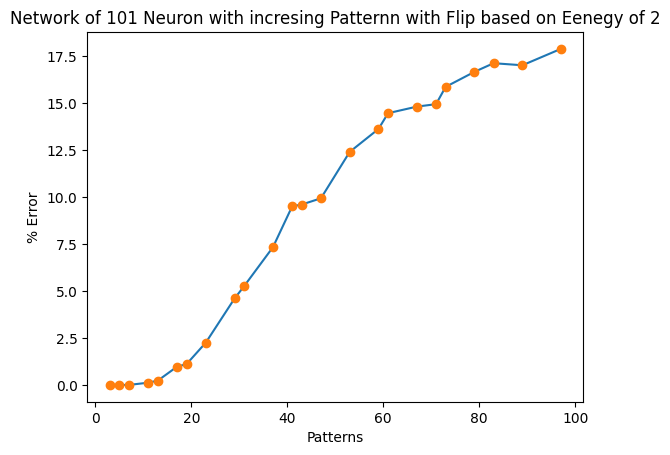


 
 Duration: 0:05:49.400090


In [32]:
# start_time = time.time()
start_times = datetime.now()

for i in b:
    result = []
    for j in tqdm.tqdm(a):
        # neuron = []
        error = []
        for nn in range(105):
            v = Thresh(np.random.normal(size=(j,i)))
            k = np.random.randint(len(v))
            vr = v[k]
            y = steady_statez_flip_new(v,vr,2)
            # neuron.append(y[1])
            error.append(y[2])
        use = round(st.mean(error),2)
        rr = (y[1],use,j)
        result.append(rr)
    print("\n \n Data: (Neurons, % Error, number of patterns)")
    print(result)
    # x_val = [x[0] for x in result]
    # y_val = [x[1] for x in result]
    

    
    s = '{}{}{}'.format('Network of ', i, ' Neuron with incresing Pattern with Flip based on Eenegy of 2')
    
    x_val = [x for x in a]
    y_val = [x[1] for x in result]
    
    
    plt.plot(x_val,y_val)
    plt.plot(x_val,y_val,'o') 
    plt.title(s)
    plt.ylabel('% Error')
    plt.xlabel('Patterns')
    plt.show()
    
    
    
    
    # plt.plot(x_val,y_val)
    # plt.plot(x_val,y_val,'o')
    # plt.title('Random Single Pattern')
    # plt.xlabel('Neurons')
    # plt.ylabel('Hamming')
    # plt.show()
    
df3b = pd.DataFrame(
    result, columns=['Neurons', '% Error', 'number of patterns'], dtype=float)

result = None
    
# print("\n \n \n --- %s seconds ---" % (time.time() - start_time))


end_times = datetime.now()
print('\n \n Duration: {}'.format(end_times - start_times))

In [38]:
 
# os.makedirs('folder/subfolder', exist_ok=True)  
df3b.to_csv("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P2.csv",index = False) 

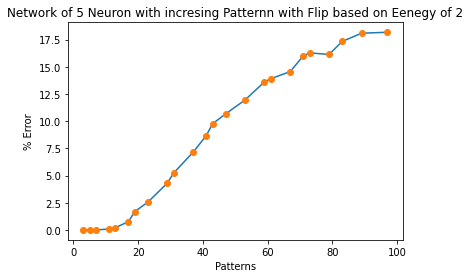

In [83]:
x_val = [x for x in df3b['number of patterns']]
y_val = [x for x in df3b['% Error']]


plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'o') 
plt.title(s)
plt.ylabel('% Error')
plt.xlabel('Patterns')

plt.savefig("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P2.png",dpi=2000,
pad_inches = 0,bbox_inches='tight',transparent = False)

100%|██████████| 24/24 [03:39<00:00,  9.14s/it]



 
 Data: (Neurons, % Error, number of patterns)
[(101, 0, 3), (101, 0, 5), (101, 0, 7), (101, 0, 11), (101, 0, 13), (101, 0, 17), (101, 0, 19), (101, 0, 23), (101, 0, 29), (101, 0, 31), (101, 0, 37), (101, 0, 41), (101, 0, 43), (101, 0, 47), (101, 0, 53), (101, 0, 59), (101, 0, 61), (101, 0, 67), (101, 0, 71), (101, 0, 73), (101, 0, 79), (101, 0, 83), (101, 0, 89), (101, 0, 97)]


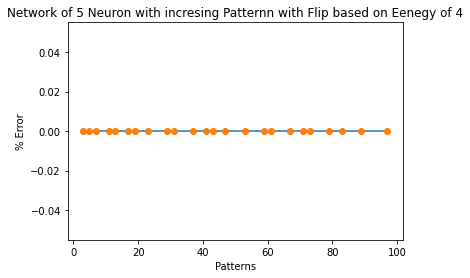


 
 Duration: 0:03:39.488690


In [84]:
# start_time = time.time()
start_times = datetime.now()

for i in b:
    result = []
    for j in tqdm.tqdm(a):
        # neuron = []
        error = []
        for nn in range(105):
            v = Thresh(np.random.normal(size=(j,i)))
            k = np.random.randint(len(v))
            vr = v[k]
            y = steady_statez_flip_new(v,vr,4)
            # neuron.append(y[1])
            error.append(y[2])
        use = round(st.mean(error),2)
        rr = (y[1],use,j)
        result.append(rr)
    print("\n \n Data: (Neurons, % Error, number of patterns)")
    print(result)
    # x_val = [x[0] for x in result]
    # y_val = [x[1] for x in result]
    

    
    s = '{}{}{}'.format('Network of ', i, ' Neuron with incresing Pattern with Flip based on Eenegy of 4')
    
    x_val = [x for x in a]
    y_val = [x[1] for x in result]
    
    
    plt.plot(x_val,y_val)
    plt.plot(x_val,y_val,'o') 
    plt.title(s)
    plt.ylabel('% Error')
    plt.xlabel('Patterns')
    plt.show()
    
    # plt.savefig("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P4_100.png",dpi=2000,
    # pad_inches = 0,bbox_inches='tight')
    
    # plt.plot(x_val,y_val)
    # plt.plot(x_val,y_val,'o')
    # plt.title('Random Single Pattern')
    # plt.xlabel('Neurons')
    # plt.ylabel('Hamming')
    # plt.show()
    
df4b = pd.DataFrame(
    result, columns=['Neurons', '% Error', 'number of patterns'], dtype=float)

result = None
    
# print("\n \n \n --- %s seconds ---" % (time.time() - start_time))


end_times = datetime.now()
print('\n \n Duration: {}'.format(end_times - start_times))

In [ ]:
df4b.to_csv("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P4_100.csv",index = False)

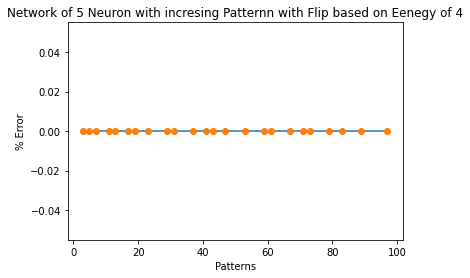

In [85]:
x_val = [x for x in df4b['number of patterns']]
y_val = [x for x in df4b['% Error']]


plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'o') 
plt.title(s)
plt.ylabel('% Error')
plt.xlabel('Patterns')

plt.savefig("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P4_100.png",dpi=2000,
pad_inches = 0,bbox_inches='tight', transparent = False)

In [26]:

g = prime_generator(5000)     # give firt 1000 prime numbers
a = list(g)
q = Prime_ramge(100,102)
b = list(q)

100%|██████████| 668/668 [6:27:03<00:00, 34.77s/it]  



 
 Data: (Neurons, % Error, number of patterns)
[(101, 0, 3), (101, 0, 5), (101, 0, 7), (101, 0, 11), (101, 0, 13), (101, 0, 17), (101, 0, 19), (101, 0, 23), (101, 0, 29), (101, 0, 31), (101, 0, 37), (101, 0, 41), (101, 0, 43), (101, 0, 47), (101, 0, 53), (101, 0, 59), (101, 0, 61), (101, 0, 67), (101, 0, 71), (101, 0, 73), (101, 0, 79), (101, 0, 83), (101, 0, 89), (101, 0, 97), (101, 0, 101), (101, 0, 103), (101, 0, 107), (101, 0, 109), (101, 0, 113), (101, 0, 127), (101, 0, 131), (101, 0, 137), (101, 0, 139), (101, 0, 149), (101, 0, 151), (101, 0, 157), (101, 0, 163), (101, 0, 167), (101, 0, 173), (101, 0, 179), (101, 0, 181), (101, 0, 191), (101, 0, 193), (101, 0, 197), (101, 0, 199), (101, 0, 211), (101, 0, 223), (101, 0, 227), (101, 0, 229), (101, 0, 233), (101, 0, 239), (101, 0, 241), (101, 0, 251), (101, 0, 257), (101, 0, 263), (101, 0, 269), (101, 0, 271), (101, 0, 277), (101, 0, 281), (101, 0, 283), (101, 0, 293), (101, 0, 307), (101, 0, 311), (101, 0, 313), (101, 0, 317), (1

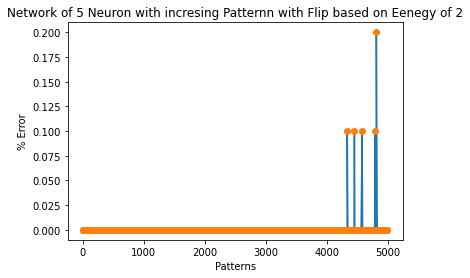


 
 Duration: 6:27:07.365313


<Figure size 432x288 with 0 Axes>

In [27]:
# start_time = time.time()
start_times = datetime.now()

for i in b:
    result = []
    for j in tqdm.tqdm(a):
        # neuron = []
        error = []
        for nn in range(10):
            v = Thresh(np.random.normal(size=(j,i)))
            k = np.random.randint(len(v))
            vr = v[k]
            y = steady_statez_flip_new(v,vr,4)
            # neuron.append(y[1])
            error.append(y[2])
        use = round(st.mean(error),2)
        rr = (y[1],use,j)
        result.append(rr)
    print("\n \n Data: (Neurons, % Error, number of patterns)")
    print(result)
    # x_val = [x[0] for x in result]
    # y_val = [x[1] for x in result]
    

    
    s = '{}{}{}'.format('Network of ', i, ' Neuron with incresing Pattern with Flip based on Eenegy of 2')
    
    x_val = [x for x in a]
    y_val = [x[1] for x in result]
    
    
    plt.plot(x_val,y_val)
    plt.plot(x_val,y_val,'o') 
    plt.title(s)
    plt.ylabel('% Error')
    plt.xlabel('Patterns')
    plt.show()
    
    # plt.savefig("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P4_5000_10.png",dpi=2000,
    # pad_inches = 0,bbox_inches='tight')
    
    # plt.plot(x_val,y_val)
    # plt.plot(x_val,y_val,'o')
    # plt.title('Random Single Pattern')
    # plt.xlabel('Neurons')
    # plt.ylabel('Hamming')
    # plt.show()
    
df5 = pd.DataFrame(
    result, columns=['Neurons', '% Error', 'number of patterns'], dtype=float)

result = None
    
# print("\n \n \n --- %s seconds ---" % (time.time() - start_time))


end_times = datetime.now()
print('\n \n Duration: {}'.format(end_times - start_times))

In [ ]:
df5.to_csv("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P4_5000_10.csv",index = False)

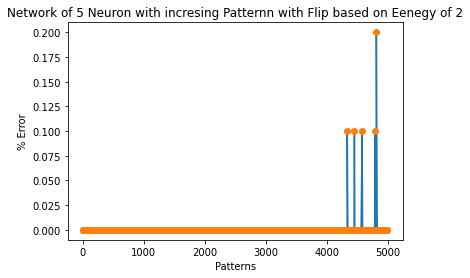

In [52]:
x_val = [x for x in df5['number of patterns']]
y_val = [x for x in df5['% Error']]


plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'o') 
plt.title(s)
plt.ylabel('% Error')
plt.xlabel('Patterns')

plt.savefig("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P4_5000_10.png",dpi=2000,
pad_inches = 0,bbox_inches='tight', transparent = False)

In [31]:

g = prime_generator(6000)     # give firt 1000 prime numbers
a = list(g)
q = Prime_ramge(100,102)
b = list(q)

100%|██████████| 782/782 [9:25:56<00:00, 43.42s/it]  


 
 Data: (Neurons, % Error, number of patterns)
[(101, 0, 3), (101, 0, 5), (101, 0, 7), (101, 0, 11), (101, 0, 13), (101, 0, 17), (101, 0, 19), (101, 0, 23), (101, 0, 29), (101, 0, 31), (101, 0, 37), (101, 0, 41), (101, 0, 43), (101, 0, 47), (101, 0, 53), (101, 0, 59), (101, 0, 61), (101, 0, 67), (101, 0, 71), (101, 0, 73), (101, 0, 79), (101, 0, 83), (101, 0, 89), (101, 0, 97), (101, 0, 101), (101, 0, 103), (101, 0, 107), (101, 0, 109), (101, 0, 113), (101, 0, 127), (101, 0, 131), (101, 0, 137), (101, 0, 139), (101, 0, 149), (101, 0, 151), (101, 0, 157), (101, 0, 163), (101, 0, 167), (101, 0, 173), (101, 0, 179), (101, 0, 181), (101, 0, 191), (101, 0, 193), (101, 0, 197), (101, 0, 199), (101, 0, 211), (101, 0, 223), (101, 0, 227), (101, 0, 229), (101, 0, 233), (101, 0, 239), (101, 0, 241), (101, 0, 251), (101, 0, 257), (101, 0, 263), (101, 0, 269), (101, 0, 271), (101, 0, 277), (101, 0, 281), (101, 0, 283), (101, 0, 293), (101, 0, 307), (101, 0, 311), (101, 0, 313), (101, 0, 317), (1

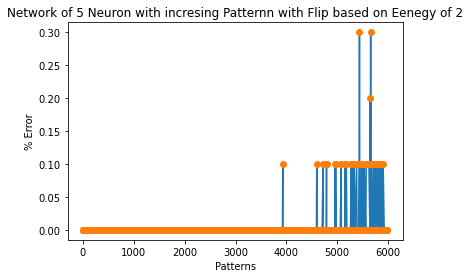


 
 Duration: 9:26:00.361833


<Figure size 432x288 with 0 Axes>

In [32]:
# start_time = time.time()
start_times = datetime.now()

for i in b:
    result = []
    for j in tqdm.tqdm(a):
        # neuron = []
        error = []
        for nn in range(10):
            v = Thresh(np.random.normal(size=(j,i)))
            k = np.random.randint(len(v))
            vr = v[k]
            y = steady_statez_flip_new(v,vr,4)
            # neuron.append(y[1])
            error.append(y[2])
        use = round(st.mean(error),2)
        rr = (y[1],use,j)
        result.append(rr)
    print("\n \n Data: (Neurons, % Error, number of patterns)")
    print(result)
    # x_val = [x[0] for x in result]
    # y_val = [x[1] for x in result]
    

    
    s = '{}{}{}'.format('Network of ', i, ' Neuron with incresing Pattern with Flip based on Eenegy of 2')
    
    x_val = [x for x in a]
    y_val = [x[1] for x in result]
    
    
    plt.plot(x_val,y_val)
    plt.plot(x_val,y_val,'o') 
    plt.title(s)
    plt.ylabel('% Error')
    plt.xlabel('Patterns')
    plt.show()
    
    # plt.savefig("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P4_6000_10.png",dpi=2000,
    # pad_inches = 0,bbox_inches='tight')
    
    # plt.plot(x_val,y_val)
    # plt.plot(x_val,y_val,'o')
    # plt.title('Random Single Pattern')
    # plt.xlabel('Neurons')
    # plt.ylabel('Hamming')
    # plt.show()
    
df6 = pd.DataFrame(
    result, columns=['Neurons', '% Error', 'number of patterns'], dtype=float)

result = None
    
# print("\n \n \n --- %s seconds ---" % (time.time() - start_time))


end_times = datetime.now()
print('\n \n Duration: {}'.format(end_times - start_times))

In [39]:
df6.to_csv("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P4_6000_10.csv",index = False)

,Neurons,% Error,number of patterns
0,101.0,0.0,3.0
1,101.0,0.0,5.0
2,101.0,0.0,7.0
3,101.0,0.0,11.0
4,101.0,0.0,13.0
...,...,...,...
777,101.0,0.0,5927.0
778,101.0,0.0,5939.0
779,101.0,0.0,5953.0
780,101.0,0.0,5981.0


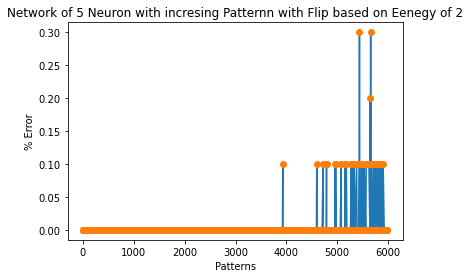

In [51]:
x_val = [x for x in df6['number of patterns']]
y_val = [x for x in df6['% Error']]


plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'o') 
plt.title(s)
plt.ylabel('% Error')
plt.xlabel('Patterns')


plt.savefig("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P4_6000_10.png",dpi=2000,
pad_inches = 0,bbox_inches='tight', transparent = False)

In [33]:

g = prime_generator(10000)     # give firt 1000 prime numbers
a = list(g)
q = Prime_ramge(100,102)
b = list(q)

100%|██████████| 1228/1228 [5:03:46<00:00, 14.84s/it]  


 
 Data: (Neurons, % Error, number of patterns)
[(101, 0, 3), (101, 0, 5), (101, 0, 7), (101, 0, 11), (101, 0, 13), (101, 0, 17), (101, 0, 19), (101, 0, 23), (101, 0, 29), (101, 0, 31), (101, 0, 37), (101, 0, 41), (101, 0, 43), (101, 0, 47), (101, 0, 53), (101, 0, 59), (101, 0, 61), (101, 0, 67), (101, 0, 71), (101, 0, 73), (101, 0, 79), (101, 0, 83), (101, 0, 89), (101, 0, 97), (101, 0, 101), (101, 0, 103), (101, 0, 107), (101, 0, 109), (101, 0, 113), (101, 0, 127), (101, 0, 131), (101, 0, 137), (101, 0, 139), (101, 0, 149), (101, 0, 151), (101, 0, 157), (101, 0, 163), (101, 0, 167), (101, 0, 173), (101, 0, 179), (101, 0, 181), (101, 0, 191), (101, 0, 193), (101, 0, 197), (101, 0, 199), (101, 0, 211), (101, 0, 223), (101, 0, 227), (101, 0, 229), (101, 0, 233), (101, 0, 239), (101, 0, 241), (101, 0, 251), (101, 0, 257), (101, 0, 263), (101, 0, 269), (101, 0, 271), (101, 0, 277), (101, 0, 281), (101, 0, 283), (101, 0, 293), (101, 0, 307), (101, 0, 311), (101, 0, 313), (101, 0, 317), (1

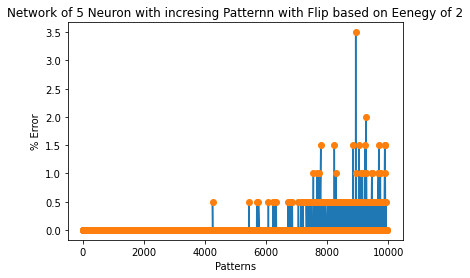


 
 Duration: 5:03:50.567222


<Figure size 432x288 with 0 Axes>

In [34]:
# start_time = time.time()
start_times = datetime.now()

for i in b:
    result = []
    for j in tqdm.tqdm(a):
        # neuron = []
        error = []
        for nn in range(2):
            v = Thresh(np.random.normal(size=(j,i)))
            k = np.random.randint(len(v))
            vr = v[k]
            y = steady_statez_flip_new(v,vr,4)
            # neuron.append(y[1])
            error.append(y[2])
        use = round(st.mean(error),2)
        rr = (y[1],use,j)
        result.append(rr)
    print("\n \n Data: (Neurons, % Error, number of patterns)")
    print(result)
    # x_val = [x[0] for x in result]
    # y_val = [x[1] for x in result]
    

    
    s = '{}{}{}'.format('Network of ', i, ' Neuron with incresing Pattern with Flip based on Eenegy of 4')
    
    x_val = [x for x in a]
    y_val = [x[1] for x in result]
    
    
    plt.plot(x_val,y_val)
    plt.plot(x_val,y_val,'o') 
    plt.title(s)
    plt.ylabel('% Error')
    plt.xlabel('Patterns')
    plt.show()
    
    # plt.savefig("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P2_10000_2.png",dpi=2000,
    # pad_inches = 0,bbox_inches='tight')
    
    # plt.plot(x_val,y_val)
    # plt.plot(x_val,y_val,'o')
    # plt.title('Random Single Pattern')
    # plt.xlabel('Neurons')
    # plt.ylabel('Hamming')
    # plt.show()
    
df7 = pd.DataFrame(
    result, columns=['Neurons', '% Error', 'number of patterns'], dtype=float)

result = None
    
# print("\n \n \n --- %s seconds ---" % (time.time() - start_time))


end_times = datetime.now()
print('\n \n Duration: {}'.format(end_times - start_times))

In [42]:
df7.to_csv("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P4_10000_2.csv",index = False)

<bound method DataFrame.info of       Neurons  % Error  number of patterns
0       101.0      0.0                 3.0
1       101.0      0.0                 5.0
2       101.0      0.0                 7.0
3       101.0      0.0                11.0
4       101.0      0.0                13.0
...       ...      ...                 ...
1223    101.0      0.0              9931.0
1224    101.0      0.0              9941.0
1225    101.0      0.0              9949.0
1226    101.0      0.0              9967.0
1227    101.0      0.0              9973.0

[1228 rows x 3 columns]>

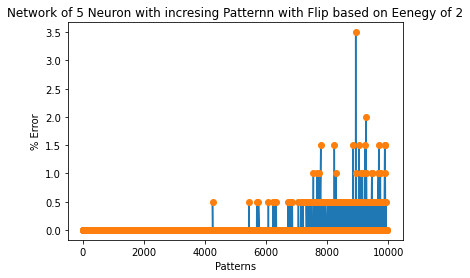

In [50]:
x_val = [x for x in df7['number of patterns']]
y_val = [x for x in df7['% Error']]


plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'o') 
plt.title(s)
plt.ylabel('% Error')
plt.xlabel('Patterns')

plt.savefig("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P4_10000_2.png",dpi=2000,
pad_inches = 0,bbox_inches='tight', transparent = False)

In [ ]:
result = None

In [ ]:
gc.collect()

# Read in the data

In [64]:
df1 = pd.read_csv(r'C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P2.csv')
df2 = pd.read_csv(r'C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P4_100.csv')
df3 = pd.read_csv(r'C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P4_5000_10.csv')
df4 = pd.read_csv(r'C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P4_6000_10.csv')
df5 = pd.read_csv(r'C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P2_10000_2.csv')
# df6 = pd.read_csv(r'C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P2.csv')
# df7 = pd.read_csv(r'C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P2.csv')
# df8 = pd.read_csv(r'C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P2.csv')

In [65]:
	df1['% neurons to pattern'] = (df1['number of patterns']/df1['Neurons'])*100
	df2['% neurons to pattern'] = (df2['number of patterns']/df2['Neurons'])*100
	df3['% neurons to pattern'] = (df3['number of patterns']/df3['Neurons'])*100
	df4['% neurons to pattern'] = (df4['number of patterns']/df4['Neurons'])*100
	df5['% neurons to pattern'] = (df5['number of patterns']/df5['Neurons'])*100
	# df6['% neurons to pattern'] = (df6['number of patterns']/df6['Neurons'])*100
	# df7['% neurons to pattern'] = (df7['number of patterns']/df7['Neurons'])*100
	# df8['% neurons to pattern'] = (df8['number of patterns']/df8['Neurons'])*100


In [74]:
# df4.query('"% Error" > 1')

df1.loc[(df1['% Error'] > 0)].head()
# df2.loc[(df2['% Error'] > 0)]
# df3.loc[(df3['% Error'] > 0)]
# df4.loc[(df4['% Error'] > 0)]
# df5.loc[(df5['% Error'] > 0)]
# df6.loc[(df6['% Error'] > 0)]
# df7.loc[(df7['% Error'] > 0)]
# df8.loc[(df8['% Error'] > 0)]


# df.loc[df['% Error'] != 'Spark']

,Neurons,% Error,number of patterns,% neurons to pattern
3,101.0,0.11,11.0,10.891089
4,101.0,0.20,13.0,12.871287
5,101.0,0.98,17.0,16.831683
6,101.0,1.36,19.0,18.811881
7,101.0,2.12,23.0,22.772277


In [73]:
df2.loc[(df2['% Error'] > 0)].head()

,Neurons,% Error,number of patterns,% neurons to pattern


In [68]:

df3.loc[(df3['% Error'] > 0)]

,Neurons,% Error,number of patterns,% neurons to pattern
491,101.0,0.1,3529.0,3494.059406
533,101.0,0.1,3853.0,3814.851485
629,101.0,0.1,4663.0,4616.831683
634,101.0,0.1,4721.0,4674.257426
659,101.0,0.1,4943.0,4894.059406
667,101.0,0.1,4999.0,4949.504950


In [72]:

df4.loc[(df4['% Error'] > 0)].head()

,Neurons,% Error,number of patterns,% neurons to pattern
562,101.0,0.1,4093.0,4052.475248
598,101.0,0.1,4409.0,4365.346535
600,101.0,0.1,4423.0,4379.207921
618,101.0,0.1,4583.0,4537.623762
633,101.0,0.1,4703.0,4656.435644


In [71]:

df5.loc[(df5['% Error'] > 0)].head()

,Neurons,% Error,number of patterns,% neurons to pattern
513,101.0,0.5,3691.0,3654.455446
568,101.0,0.5,4139.0,4098.019802
583,101.0,0.5,4261.0,4218.811881
669,101.0,0.5,5009.0,4959.405941
726,101.0,0.5,5507.0,5452.475248


In [33]:
# print(df1)
# print(df2)
# print(df3)
# print(df4)
# print(df5)

In [35]:
df5.head()

,Neurons,% Error,number of patterns
0,101.0,0.0,3.0
1,101.0,0.0,5.0
2,101.0,0.0,7.0
3,101.0,0.0,11.0
4,101.0,0.0,13.0


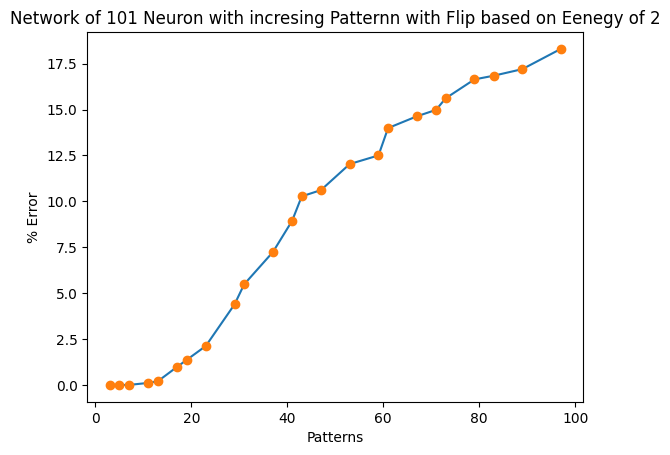

In [46]:
# df1.nunique()

# count = df1['Neurons'].value_counts()
# count

df1.Neurons = df1.Neurons.astype(int)
df1['number of patterns'] = df1['number of patterns'].astype(int)

N = df1.iloc[0]['Neurons'].astype(int)
s = '{}{}{}'.format('Network of ', N, ' Neuron with incresing Pattern with Flip based on Eenegy of 2')


x_val = [x for x in df1['number of patterns']]
y_val = [x for x in df1['% Error']]


plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'o') 
plt.title(s)
plt.ylabel('% Error')
plt.xlabel('Patterns')

plt.savefig("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_E2.png",dpi=2000,
pad_inches = 0,bbox_inches='tight', transparent = False)

# plt.show()

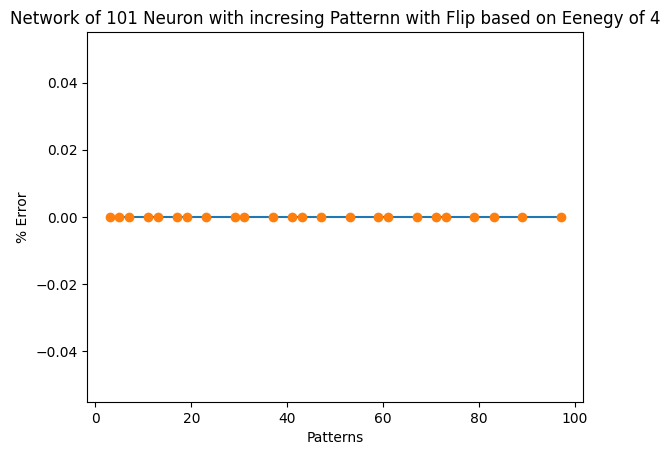

In [48]:
# df2.nunique()

# count = df2['Neurons'].value_counts()
# count

df2.Neurons = df2.Neurons.astype(int)
df2['number of patterns'] = df2['number of patterns'].astype(int)

N = df2.iloc[0]['Neurons'].astype(int)
s = '{}{}{}'.format('Network of ', N, ' Neuron with incresing Pattern with Flip based on Eenegy of 4')


x_val = [x for x in df2['number of patterns']]
y_val = [x for x in df2['% Error']]


plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'o') 
plt.title(s)
plt.ylabel('% Error')
plt.xlabel('Patterns')

plt.savefig("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_E4_100.png",dpi=2000,
pad_inches = 0,bbox_inches='tight', transparent = False)

# plt.show()

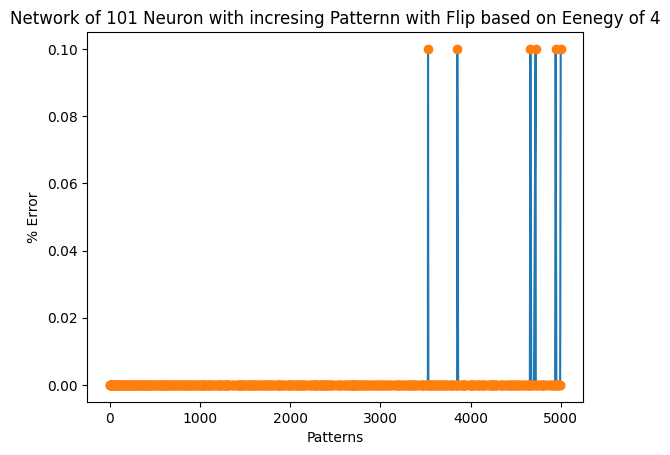

In [49]:
# df3.nunique()

# count = df3['Neurons'].value_counts()
# count

df3.Neurons = df3.Neurons.astype(int)
df3['number of patterns'] = df3['number of patterns'].astype(int)

N = df3.iloc[0]['Neurons'].astype(int)
s = '{}{}{}'.format('Network of ', N, ' Neuron with incresing Pattern with Flip based on Eenegy of 4')


x_val = [x for x in df3['number of patterns']]
y_val = [x for x in df3['% Error']]


plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'o') 
plt.title(s)
plt.ylabel('% Error')
plt.xlabel('Patterns')

plt.savefig("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_E4_5000_10.png",dpi=2000,
pad_inches = 0,bbox_inches='tight', transparent = False)

# plt.show()

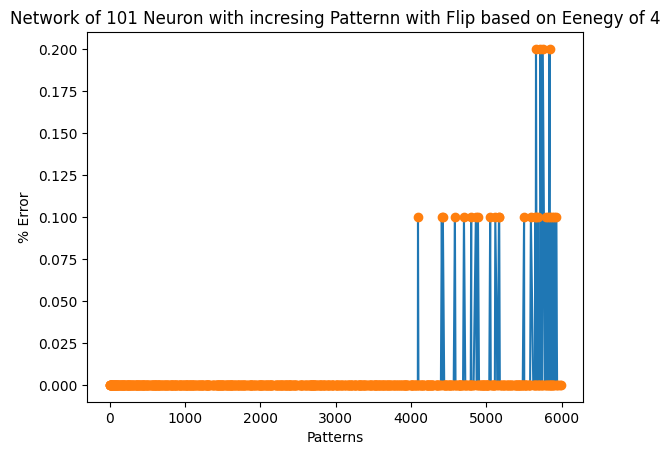

In [50]:
# df4.nunique()

# count = df4['Neurons'].value_counts()
# count

df4.Neurons = df4.Neurons.astype(int)
df4['number of patterns'] = df4['number of patterns'].astype(int)

N = df4.iloc[0]['Neurons'].astype(int)
s = '{}{}{}'.format('Network of ', N, ' Neuron with incresing Pattern with Flip based on Eenegy of 4')


x_val = [x for x in df4['number of patterns']]
y_val = [x for x in df4['% Error']]


plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'o') 
plt.title(s)
plt.ylabel('% Error')
plt.xlabel('Patterns')

plt.savefig("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_E4_6000_10.png",dpi=2000,
pad_inches = 0,bbox_inches='tight', transparent = False)

# plt.show()

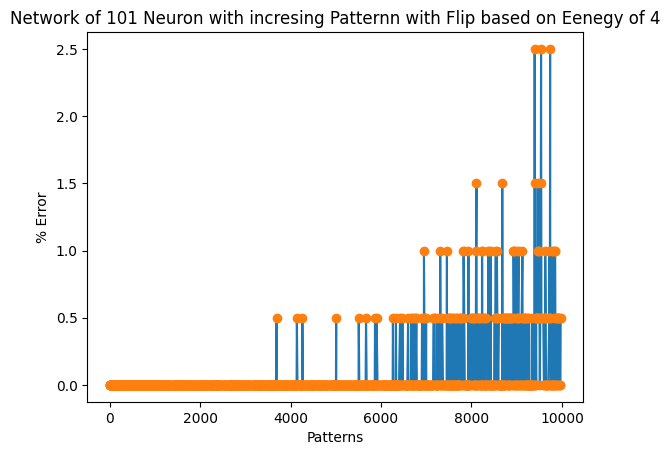

In [51]:
# df5.nunique()

# count = df5['Neurons'].value_counts()
# count

df5.Neurons = df5.Neurons.astype(int)
df5['number of patterns'] = df5['number of patterns'].astype(int)

N = df5.iloc[0]['Neurons'].astype(int)
s = '{}{}{}'.format('Network of ', N, ' Neuron with incresing Pattern with Flip based on Eenegy of 4')


x_val = [x for x in df5['number of patterns']]
y_val = [x for x in df5['% Error']]


plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'o') 
plt.title(s)
plt.ylabel('% Error')
plt.xlabel('Patterns')

plt.savefig("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_E4_10000_2.png",dpi=2000,
pad_inches = 0,bbox_inches='tight', transparent = False)

# plt.show()

In [ ]:
# df6.nunique()

# count = df6['Neurons'].value_counts()
# count

df6.Neurons = df6.Neurons.astype(int)
df6['number of patterns'] = df6['number of patterns'].astype(int)

N = df6.iloc[0]['Neurons'].astype(int)
s = '{}{}{}'.format('Network of ', N, ' Neuron with incresing Pattern with Flip based on Eenegy of 2')


x_val = [x for x in df6['number of patterns']]
y_val = [x for x in df6['% Error']]


plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'o') 
plt.title(s)
plt.ylabel('% Error')
plt.xlabel('Patterns')

plt.savefig("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P2_10000_E2.png",dpi=2000,
pad_inches = 0,bbox_inches='tight', transparent = False)

# plt.show()

In [ ]:
# df7.nunique()

# count = df7['Neurons'].value_counts()
# count

df7.Neurons = df7.Neurons.astype(int)
df7['number of patterns'] = df7['number of patterns'].astype(int)

N = df7.iloc[0]['Neurons'].astype(int)
s = '{}{}{}'.format('Network of ', N, ' Neuron with incresing Pattern with Flip based on Eenegy of 4')


x_val = [x for x in df7['number of patterns']]
y_val = [x for x in df7['% Error']]


plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'o') 
plt.title(s)
plt.ylabel('% Error')
plt.xlabel('Patterns')

plt.savefig("C:/Users/scrwh/Documents/rmarkdown/hopfield_Network/data/steady_statez_flip_new_P2_10000_E2.png",dpi=2000,
pad_inches = 0,bbox_inches='tight', transparent = False)

# plt.show()